# Incidence of chicken pox illness in France

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import requests

The data on the incidence of chicken pox illness are available from the Web site of the [Réseau Sentinelles](http://www.sentiweb.fr/). We download them as a file in CSV format, and store them in case either the URL or the format ever change, in which each line corresponds to a week in the observation period. Only the complete dataset, starting in 1990 and ending with a recent week, is available for download.

In [2]:
local_data_file_name = "incidence-PAY-7.csv"
if not os.path.isfile(local_data_file_name) or os.path.getsize(local_data_file_name) == 0:
    with open(local_data_file_name, 'wb') as local_data_file:
        data_url = f"http://www.sentiweb.fr/datasets/{local_data_file_name}"
        r = requests.get(data_url)
        local_data_file.write(r.content)

This is the documentation of the data from [the download site](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Column name  | Description                                                                                                               |
|--------------|---------------------------------------------------------------------------------------------------------------------------|
| `week`       | ISO8601 Yearweek number as numeric (year times 100 + week nubmer)                                                               |
| `indicator`  | Unique identifier of the indicator, see metadata document https://www.sentiweb.fr/meta.json                               |
| `inc`        | Estimated incidence value for the time step, in the geographic level                                                      |
| `inc_low`    | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc_up`     | Upper bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100`     | Estimated rate incidence per 100,000 inhabitants                                                                          |
| `inc100_low` | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100_up`  | Upper bound of the estimated rate incidence 95% Confidence Interval                                                       |
| `geo_insee`  | Identifier of the geographic area, from INSEE https://www.insee.fr                                                        |
| `geo_name`   | Geographic label of the area, corresponding to INSEE code. This label is not an id and is only provided for human reading |

The first line of the CSV file is a comment, which we ignore with `skiprows=1`.

In [3]:
data = pd.read_csv(local_data_file_name, skiprows=1)
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202117          7   4750     2909    6591       7           4   
1     202116          7   4780     2891    6669       7           4   
2     202115          7  11215     7627   14803      17          12   
3     202114          7  11197     7994   14400      17          12   
4     202113          7   9714     6289   13139      15          10   
5     202112          7  11520     8415   14625      17          12   
6     202111          7   9386     6678   12094      14          10   
7     202110          7   9056     6452   11660      14          10   
8     202109          7  10988     7938   14038      17          12   
9     202108          7  11281     8361   14201      17          13   
10    202107          7  13561    10315   16807      21          16   
11    202106          7  13401     9810   16992      20          15   
12    202105          7  12210     8988   15432      18          13   
13    202104          7  12026     8826   15226      18          13   
14    202103          7   8913     6375   11451      13           9   
15    202102          7   7795     5430   10160      12           8   
16    202101          7  10525     7750   13300      16          12   
17    202053          7  11978     8406   15550      18          13   
18    202052          7  12012     8285   15739      18          12   
19    202051          7  10564     7574   13554      16          11   
20    202050          7   7063     4744    9382      11           7   
21    202049          7   5026     3145    6907       8           5   
22    202048          7   6683     4312    9054      10           6   
23    202047          7   4999     2963    7035       8           5   
24    202046          7   3752     1963    5541       6           3   
25    202045          7   3696     2016    5376       6           3   
26    202044          7   4391     2375    6407       7           4   
27    202043          7   4376     2505    6247       7           4   
28    202042          7   4000     1979    6021       6           3   
29    202041          7   3961     2099    5823       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1557  199126          7  17608    11304   23912      31          20   
1558  199125          7  16169    10700   21638      28          18   
1559  199124          7  16171    10071   22271      28          17   
1560  199123          7  11947     7671   16223      21          13   
1561  199122          7  15452     9953   20951      27          17   
1562  199121          7  14903     8975   20831      26          16   
1563  199120          7  19053    12742   25364      34          23   
1564  199119          7  16739    11246   22232      29          19   
1565  199118          7  21385    13882   28888      38          25   
1566  199117          7  13462     8877   18047      24          16   
1567  199116          7  14857    10068   19646      26          18   
1568  199115          7  13975     9781   18169      25          18   
1569  199114          7  12265     7684   16846      22          14   
1570  199113          7   9567     6041   13093      17          11   
1571  199112          7  10864     7331   14397      19          13   
1572  199111          7  15574    11184   19964      27          19   
1573  199110          7  16643    11372   21914      29          20   
1574  199109          7  13741     8780   18702      24          15   
1575  199108          7  13289     8813   17765      23          15   
1576  199107          7  12337     8077   16597      22          15   
1577  199106          7  10877     7013   14741      19          12   
1578  199105          7  10442     6544   14340      18          11   
1579  199104          7   7913     4563   11263      14           8   
1580  199103          7  15387    10484   20290      27          18   
1581  199102          7  16277  

Are there missing data points? No.

In [4]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Our dataset uses an uncommon encoding; the week number is attached
to the year number, leaving the impression of a six-digit integer.
That is how Pandas interprets it.

A second problem is that Pandas does not know about week numbers.
It needs to be given the dates of the beginning and end of the week.
We use the library `isoweek` for that.

Since the conversion is a bit lengthy, we write a small Python 
function for doing it. Then we apply it to all points in our dataset. 
The results go into a new column 'period'.

In [5]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

There are two more small changes to make.

First, we define the observation periods as the new index of
our dataset. That turns it into a time series, which will be
convenient later on.

Second, we sort the points chronologically.

In [6]:
sorted_data = data.set_index('period').sort_index()

We check the consistency of the data. Between the end of a period and
the beginning of the next one, the difference should be zero, or very small.
We tolerate an error of one second.

Everything is fine.

In [7]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Let's plot the data

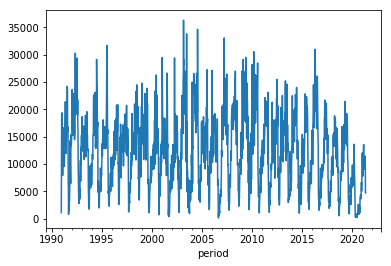

In [8]:
sorted_data['inc'].plot()

Zooming on multiple time periods shows a clear trend: the number of cases is the lowest around the summer holydays of July-August, then it grows progressively throughout the year.
We also notice anomalies around 2020 and 2021, with the number of cases being way lower and only a few after March 2020, which can be explained by the confinements due to the COVID pandemic.

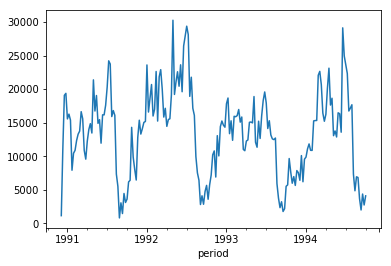

In [9]:
sorted_data['inc'][0:200].plot()

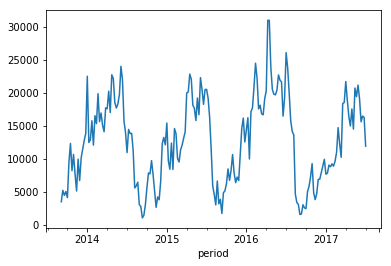

In [10]:
sorted_data['inc'][-400:-200].plot()

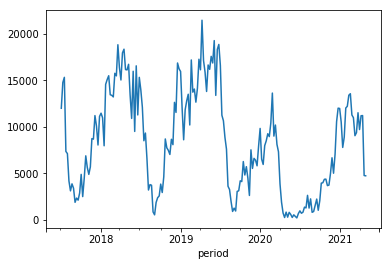

In [11]:
sorted_data['inc'][-200:].plot()

## Study of the annual incidence


Since the bottoms of the epidemic happen around August, we define the reference period for the annual
incidence from August 1st of year $N$ to August 1st of year $N+1$. We
label this period as year $N+1$ because the peak is always located in
year $N+1$. The very low incidence during the summer holydays ensures that the arbitrariness
of the choice of reference period has no impact on our conclusions.

Our task is a bit complicated by the fact that a year does not have an
integer number of weeks. Therefore we modify our reference period a bit:
instead of August 1st, we use the first day of the week containing August 1st.

A final detail: the dataset starts in December 1990, the first peak is thus
incomplete, We start the analysis with the first full peak.

In [12]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

Starting from this list of weeks that contain August 1st, we obtain intervals of approximately one year as the periods between two adjacent weeks in this list. We compute the sums of weekly incidences for all these periods.

We also check that our periods contain between 51 and 52 weeks, as a safeguard against potential mistakes in our code.

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

And here are the annual incidences:

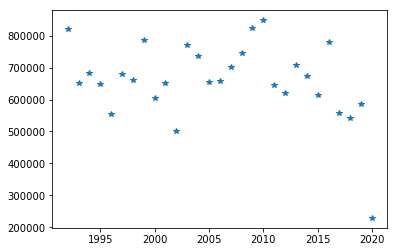

In [14]:
yearly_incidence.plot(style='*')

A sorted list makes it easier to find the highest values (at the end).

In [15]:
yearly_incidence.sort_values()

2020    229363
2002    502271
2018    543281
1996    553859
2017    557449
2019    584926
2000    605096
2015    613286
2012    620315
2011    645042
1995    648598
2001    650660
1993    653058
2005    654308
2006    657482
1998    660316
2014    673458
1997    679308
1994    682920
2007    701566
2013    708874
2004    736266
2008    745701
2003    770211
2016    780645
1999    784963
1992    821558
2009    822819
2010    848236
dtype: int64

Finally, a histogram clearly singles out the year 2020 as an anomaly. The typical epidemic affects 1% of the population, but only a third of that number in 2020.

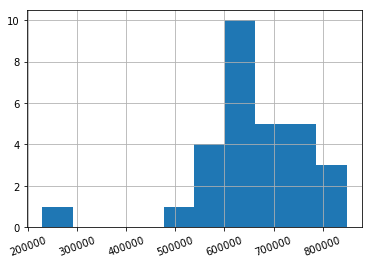

In [16]:
yearly_incidence.hist(xrot=20)